# Prediction using Unsupervised ML

## K-Means Clustering

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping clusters where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid  is at the minimum.


### Author : Sayanth R Nath

In [22]:
#Importing the libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
%matplotlib inline

In [23]:
# Reading the dataset 
data = pd.read_csv("demo/Iris.csv")
data.shape
data.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [38]:
data['SepalWidthCm'].max()

4.4

### We can Find the optimum number of clusters for k-means classification by using the elbow method as shown below !

In [24]:
#we do not need the first and last columns
x=data.iloc[:,1:5].values


In [28]:
Error=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)


Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are) The Silhouette Score is from -1 to 1 and show how close or far away the clusters are from each other and how dense the clusters are.

### We now plot the graph to observe the optimum no. of clusters

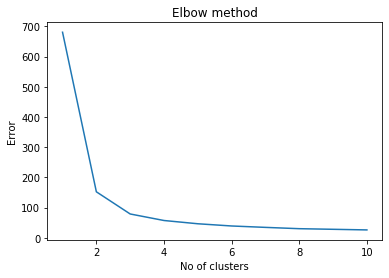

In [29]:
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

### We can infer that the optimal no. of clusters is 3 from the above graph.

So we now partition the dataset into 3 clusters

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

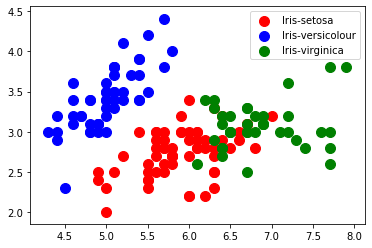

In [42]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa' )
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()